In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [102]:
def full_print(df):
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(df)

## Reading DF

In [40]:
df = pd.read_csv('breast-cancer.data', header=None)
df.columns = ['y', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
              'deg-malig', 'side', 'quad', 'irradiat']
df

,y,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,side,quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


## Fixing DF

### Remove NaN

In [21]:
len(df)

286

In [41]:
df = df.applymap(lambda d: d if not d == '?' else np.nan)
df = df.dropna()
len(df)

277

9 NaNs dropped, this matches the data description

### Encode categorical values

In [42]:
df = df.reset_index(drop=True)
df = pd.get_dummies(df, prefix_sep='_')
df = df[[i for i in df.columns if not i in ['y_no-recurrence-events', 'node-caps_no', 'irradiat_no']]]
df

,deg-malig,y_recurrence-events,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,...,inv-nodes_9-11,node-caps_yes,side_left,side_right,quad_central,quad_left_low,quad_left_up,quad_right_low,quad_right_up,irradiat_yes
0,3,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
1,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,2,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
5,2,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6,2,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
7,1,0,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,0,0,0
8,2,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
9,2,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


## Train-Test Split

In [68]:
X = df[[i for i in df.columns if not i == 'y_recurrence-events']]
y = df[['y_recurrence-events']]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,
                                                    stratify=df['y_recurrence-events'].values)

In [96]:
X_train

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,inv-nodes_9-11,node-caps_yes,side_left,side_right,quad_central,quad_left_low,quad_left_up,quad_right_low,quad_right_up,irradiat_yes
193,2,0,0,0,1,0,0,1,0,0,...,0,1,1,0,1,0,0,0,0,1
120,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
222,3,0,0,0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
170,2,0,0,0,1,0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,0
100,3,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
255,3,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
25,2,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
242,2,0,1,0,0,0,0,0,0,1,...,0,1,1,0,0,1,0,0,0,0
64,1,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
156,1,0,0,0,1,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [97]:
y_train

,y_recurrence-events
193,0
120,0
222,1
170,0
100,0
255,1
25,0
242,1
64,0
156,0


In [98]:
print('0s no treino:', len(y_train[y_train['y_recurrence-events'] == 0])/len(y_train))
print('0s no teste:', len(y_test[y_test['y_recurrence-events'] == 0])/len(y_test))
print('0s no dataset', len(y[y['y_recurrence-events'] == 0])/len(y))

0s no treino: 0.7098445595854922
0s no teste: 0.7023809523809523
0s no dataset 0.7075812274368231


## Correlação entre as colunas

#### (lembrete importante: correlação não implica causalidade)

In [103]:
correlations_matrix = df[['y_recurrence-events', *[i for i in df.columns 
                                                   if not i == 'y_recurrence-events']]].corr()
full_print(correlations_matrix)

                     y_recurrence-events  deg-malig  age_20-29  age_30-39  \
y_recurrence-events             1.000000   0.330253  -0.038695   0.105570   
deg-malig                       0.330253   1.000000  -0.004772   0.043031   
age_20-29                      -0.038695  -0.004772   1.000000  -0.023264   
age_30-39                       0.105570   0.043031  -0.023264   1.000000   
age_40-49                       0.016566   0.009116  -0.041415  -0.265925   
age_50-59                      -0.077901   0.007845  -0.042103  -0.270338   
age_60-69                       0.018243  -0.027036  -0.029961  -0.192375   
age_70-79                      -0.087160  -0.085174  -0.008161  -0.052401   
menopause_ge40                 -0.047401   0.048813  -0.053794  -0.345410   
menopause_lt40                 -0.087160  -0.010748  -0.008161   0.028239   
menopause_premeno               0.070514  -0.045776   0.055790   0.336690   
tumor-size_0-4                 -0.063472  -0.072837  -0.010380   0.061560   

Observando a matriz de correlação:

+ Idade não tem correlação
+ Deg-malig tem correlação
+ Menopausa não parece ter correlação
+ Tamanho de tumor com maior correlação: 30-34
+ inv-nodes tem correlação
+ node-caps tem correlação
+ breast-quad não parece ter correlação
+ irradiat tem correlação

## Visualizing

In [110]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [107]:
original_df = pd.read_csv('breast-cancer.data', header=None)
original_df.columns = ['y', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
              'deg-malig', 'side', 'quad', 'irradiat']
original_df['y'] = original_df['y'].map(lambda d: 0 if d.startswith('no') else 1)
original_df

,y,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,side,quad,irradiat
0,0,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,0,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,0,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,0,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,0,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,0,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,0,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,0,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,0,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,0,40-49,premeno,20-24,0-2,no,2,right,left_up,no


### Avaliando o dataset por faixa etária

<BarContainer object of 6 artists>

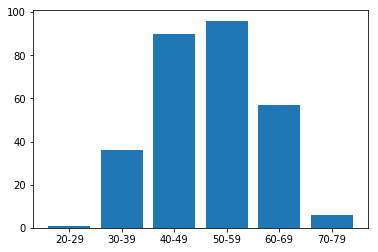

In [114]:
ages = sorted(original_df['age'].unique())
plt.bar(x=ages, height=[len(original_df[original_df['age'] == i]) for i in ages])

Quantidade de casos no dataset por faixa etária

In [118]:
rec_per_age = {}

for age in ages:
    aux_df = original_df[original_df['age'] == age]
    rate = len(aux_df[aux_df['y'] == 1])/len(aux_df)
    print(f'Positive recurrence rate for ages {age}: {rate}')
    rec_per_age[age] = rate

Positive recurrence rate for ages 20-29: 0.0
Positive recurrence rate for ages 30-39: 0.4166666666666667
Positive recurrence rate for ages 40-49: 0.3
Positive recurrence rate for ages 50-59: 0.2604166666666667
Positive recurrence rate for ages 60-69: 0.2982456140350877
Positive recurrence rate for ages 70-79: 0.16666666666666666


<BarContainer object of 6 artists>

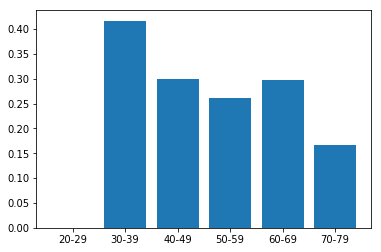

In [120]:
plt.bar(x=rec_per_age.keys(), height=rec_per_age.values())

Taxa de recorrência em % por faixa etária

In [117]:
len(original_df[original_df['age'] == '20-29'])

1

20-29 tem 0 recorrência porém só tem 1 exemplo no dataset, não dá para considerar, pelos restantes, de fato, parece que não há grande correlação entre idade e recorrência

## Creating the model

In [104]:
from pyspark import SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.sql.functions import col
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
sc = SparkContext(appName="dataquest")